# Session 8 :  

## White Wine Quality  - Multi Linear Regression 


###   About the data set 

**This data frame contains following columns**

- fixed acidity : the total concentration of acids that are not volatile, meaning they do not evaporate readily.
- volatile acidity : concentration of acetic acid and other volatile acids such as lactic, formic, and butyric acids.			
- citric acid : a weak organic acid that is naturally present in small amounts in wine.
- residual sugar :  the amount of sugar that remains unfermented in the finished wine. 
- chlorides : the concentration of chloride ions, which are a type of salt that can be naturally present in grapes and soil.
- free sulfur dioxide : the molecular form of SO2 that is present in the wine and is not bound to other molecules.
- total sulfur dioxide : the combined amount of free SO2 and bound SO2 that is present in the wine.
- density : the mass of the wine per unit volume, typically expressed in grams per milliliter (g/mL) or kilograms per liter (kg/L).
- pH : a measure of the acidity or alkalinity of a solution and is defined as the negative logarithm (base 10) of the concentration of hydrogen ions (H+) in the solution. 
- sulphates : the presence of sulfur-containing compounds, such as potassium bisulfite (KHSO3) or sodium metabisulfite (Na2S2O5), which are often added to wine as a preservative to prevent oxidation and microbial spoilage.
- alcohol : the presence of sulfur-containing compounds, such as potassium bisulfite (KHSO3) or sodium metabisulfite (Na2S2O5), which are often added to wine as a preservative to prevent oxidation and microbial spoilage.
- quality : quality of wine


## Data loading 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression


# Read data set 
data = pd.read_csv("winequality-white.csv", sep=";")
data_Y = data.loc[:,['quality']]
data_X = data.drop(columns=["quality"])

# Check shape
data.shape

(4898, 12)

## Data Analysis

Let's start with a statistical analysis

In [64]:
#We can check the statistical summary of the dataframe
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [65]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Data Distribution

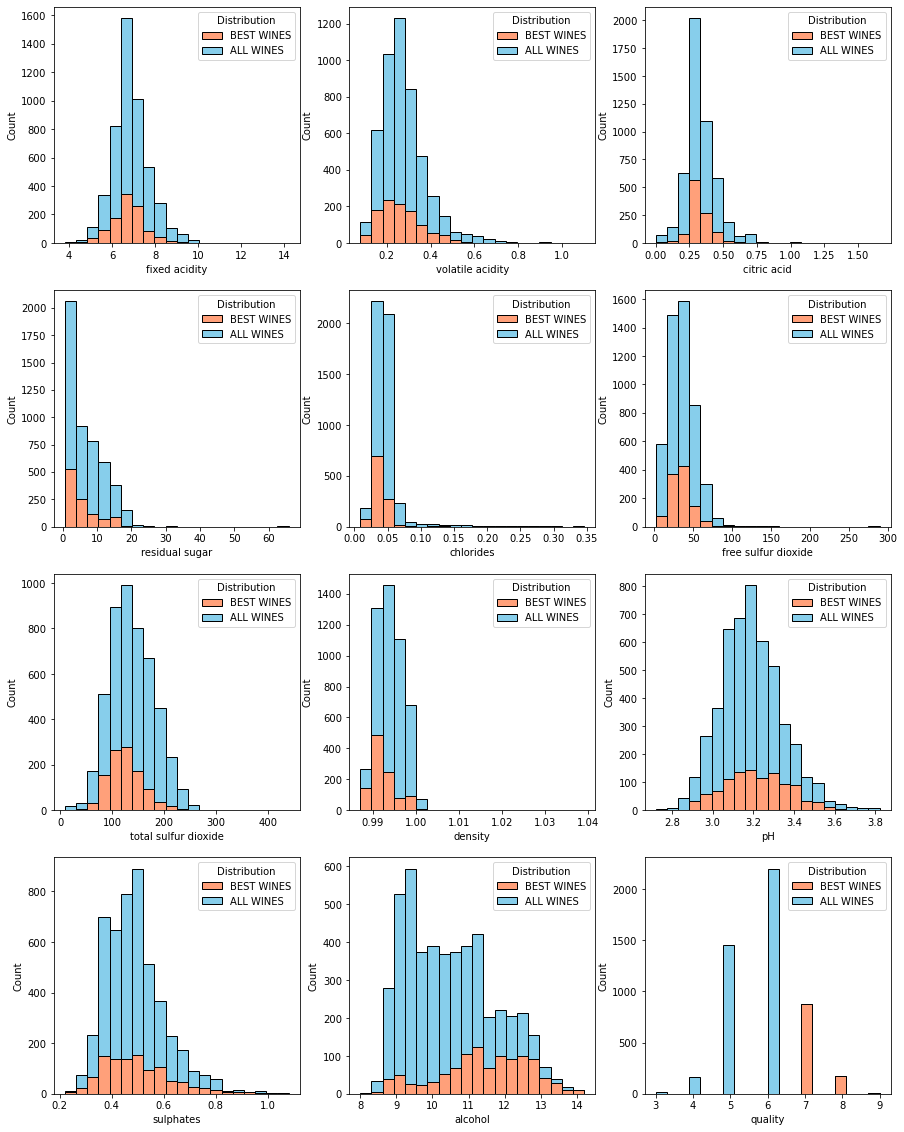

In [66]:
best_wines = data[data["quality"] >= 7]

nrow = 4
ncol = 3
fig, axs = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))


plot_data = pd.concat([pd.concat([data.reset_index(drop=True), pd.Series(["ALL WINES"] * len(data), name="Distribution")], axis=1), pd.concat([best_wines.reset_index(drop=True), pd.Series(["BEST WINES"] * len(best_wines), name="Distribution")], axis=1)], axis=0).reset_index(drop=True).sort_values("Distribution", ascending=False)
for i in range(nrow):
    for j in range(ncol):
        sns.histplot(plot_data, x=plot_data.columns[i * ncol + j], ax=axs[i][j],bins=20, hue="Distribution", alpha=1, palette=["lightsalmon","skyblue"])

In [67]:
data[data["citric acid"] == 0]["quality"].describe()

count    19.000000
mean      5.105263
std       0.875261
min       4.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       6.000000
Name: quality, dtype: float64

In [68]:
data.shape

(4898, 12)

We can see that the best wines tends to have higher alcohol, sulphates, citric acid and lower volatile acidity rates than other wines 

In [69]:
#We check missing values in the dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing data in our dataset.

Let's check if we can spot a linear relationship between our  target (quality) and any other variable

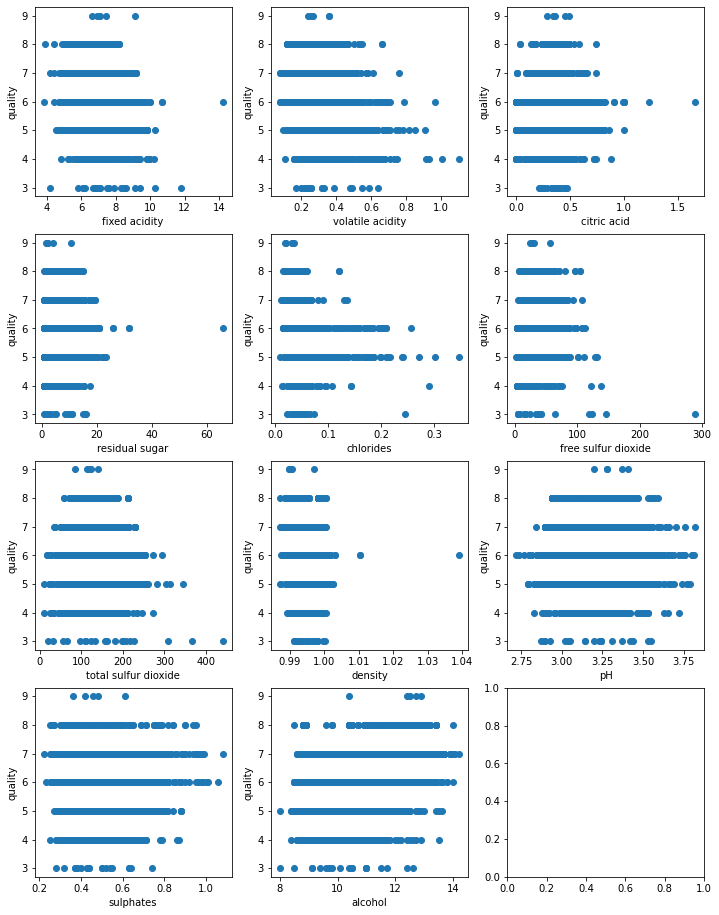

In [70]:
nrow = 4
ncol = 3
fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 4 * nrow))

for i in range(nrow):
    for j in range(ncol):
        if i == nrow - 1 and j == ncol - 1:
            break
        axs[i][j].scatter(data_X.iloc[:, i * ncol + j], data_Y)
        axs[i][j].set_xlabel(data_X.columns[i * ncol + j])
        axs[i][j].set_ylabel("quality")


There is no clear linear relationship between any of these variable and our target but alcohol and volatile acidity are somewhat linear with quality

<AxesSubplot:>

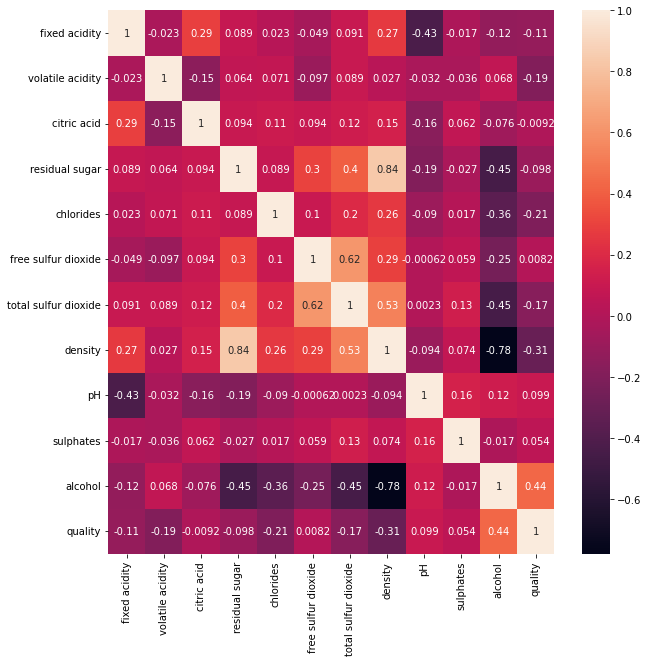

In [71]:
fig = plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Set up Independent and dependent variables



In [72]:
X = pd.DataFrame(data.iloc[:,:-1])
Y = pd.DataFrame(data.iloc[:,-1]) 

### Check our X  Data 


In [73]:
X.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### Check our Y Data 

In [74]:
Y.head(n=5)

,quality
0,6
1,6
2,6
3,6
4,6


### Split the data into train and test data sets

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

### Shape of Train and Test Sets 

In [76]:
print("X Train shape ", X_train.shape)
print("X Test shape  ", X_test.shape)
print("y Train shape ", y_train.shape)
print("y Test shape  ", y_test.shape)

X Train shape  (3918, 11)
X Test shape   (980, 11)
y Train shape  (3918, 1)
y Test shape   (980, 1)


### Train a Multiple Linear Regression Model 

In [77]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
regressor.coef_

array([[ 5.06457657e-02, -1.96341559e+00, -9.16375388e-03,
         7.69603869e-02, -6.04146574e-01,  3.16302854e-03,
        -4.93886000e-05, -1.36198618e+02,  6.71592832e-01,
         5.59628711e-01,  2.07470147e-01]])

### Review the Regression coefficients 

In [79]:
v = pd.DataFrame(regressor.coef_, index = ["Co-efficient"]).transpose()
w = pd.DataFrame(X.columns,columns = ['Attribute'])

In [80]:
coeff_df = pd.concat([w,v], axis = 1, join = 'inner')
coeff_df

,Attribute,Co-efficient
0,fixed acidity,0.050646
1,volatile acidity,-1.963416
2,citric acid,-0.009164
3,residual sugar,0.076960
4,chlorides,-0.604147
5,free sulfur dioxide,0.003163
6,total sulfur dioxide,-0.000049
7,density,-136.198618
8,pH,0.671593
9,sulphates,0.559629


### Compare Predicted Value with Actuals 

In [81]:
y_test.head(n=10)

,quality
2414,4
1584,6
3248,7
645,5
3163,7
4895,6
600,6
1379,6
1554,7
643,5


In [82]:
y_pred  = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred.head(n=10)

,Predicted
0,5.243078
1,5.552433
2,6.113296
3,5.406149
4,6.515393
5,5.344800
6,5.151003
7,5.154764
8,5.706835
9,5.772484


### Evaluate the model 

In [83]:
import numpy as np
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared  Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared", metrics.r2_score(y_true=y_test,y_pred=y_pred))

Mean Absolute Error 0.5862636893389794
Mean Squared Error 0.5425487263544198
Root Mean Squared  Error 0.7365790699948104
R Squared 0.2901221946696412


## USING OLS from stats model 


In [84]:
ols_model = sm.OLS(y_train,X_train)
ols_results = ols_model.fit()

In [85]:
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.143e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):                        0.00
Time:                        11:22:21   Log-Likelihood:                         -4476.1
No. Observations:                3918   AIC:                                      8974.
Df Residuals:                    3907   BIC:                                      9043.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## TEST Concept of R Squared and Adjusted R  Squared 

In [86]:
#from sklearn.datasets import load_boston


#### Create Arbitrary Random data columns in X data 

In [87]:
np.random.seed(11)
X['random1'] = np.random.randn(len(X))
X['random2'] = np.random.randint(len(X))
X['random3'] = np.random.normal(len(X))

### Check Mutual Info value 


In [88]:
mutual_info = mutual_info_regression(X, Y, discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


density                 0.180808
alcohol                 0.169624
residual sugar          0.086116
total sulfur dioxide    0.081541
free sulfur dioxide     0.062150
chlorides               0.054381
citric acid             0.051571
volatile acidity        0.047062
sulphates               0.043850
fixed acidity           0.030437
random1                 0.027085
pH                      0.026256
random3                 0.001633
random2                 0.000000
dtype: float64

### Observation from above 


In the above mutual information scores, we can see that alcohol and volatile acidity have a strong relationship with the target variable and the three random features that we added have no relationship with the target. 

We’ll use these mutual information scores and incrementally add one feature at a time to the model (in the same order) and record the R-squared and adjusted R-squared scores.


### Incremental addition of features to model and finding R sqd and Adjusted R squared 

In [89]:
result_df = pd.DataFrame()
for i in range(1, len(mutual_info) + 1):
    X_new = X_train.iloc[:, :i].copy()
    linear_regression = LinearRegression()
    linear_regression.fit(X_new, y_train)
    
    prediction = linear_regression.predict(X_test.iloc[:, :i].copy())
    r2 = r2_score(y_true=y_test, y_pred=prediction)
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - i - 1))
    
    result_df = result_df.append(pd.DataFrame({'r2': r2,
                                              'adj_r2': adj_r2}, index=[i]))

result_df

C:\Users\Thai\AppData\Local\Temp\ipykernel_38232\42156588.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Thai\AppData\Local\Temp\ipykernel_38232\42156588.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Thai\AppData\Local\Temp\ipykernel_38232\42156588.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Thai\AppData\Local\Temp\ipykernel_38232\42156588.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame

,r2,adj_r2
1,0.009791,0.009588
2,0.034504,0.034110
3,0.034007,0.033415
4,0.043839,0.043057
5,0.068911,0.067959
6,0.070165,0.069024
7,0.100272,0.098984
8,0.244137,0.242900
9,0.271941,0.270600
10,0.288546,0.287090


#### Plot scatter of X with Y and y pred 

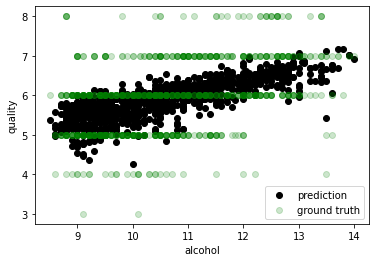

In [92]:
X = X_test['alcohol']
Y1 = y_pred 
Y2 = y_test 

plt.scatter(X,Y1,color='k', label = 'prediction') #black
plt.scatter(X,Y2,color='g', alpha=0.2,label = 'ground truth') #green
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()
plt.show()

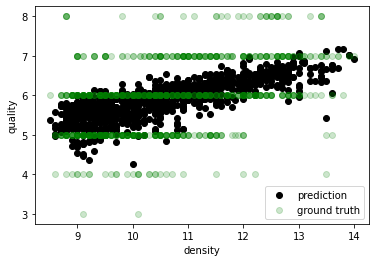

In [93]:
X = X_test['alcohol']
Y1 = y_pred 
Y2 = y_test 

plt.scatter(X,Y1,color='k', label = 'prediction') #black
plt.scatter(X,Y2,color='g', alpha=0.2,label = 'ground truth') #green
plt.xlabel('density')
plt.ylabel('quality')
plt.legend()
plt.show()

Even though the prediction and the ground truth does not seem to fit each other, they are somewhat following the positive linear relationship between alcohol and quality or density and quality. <br>
Because the quality ground truth values are integer but our prediction are float, so it doesn't really fit but we might be able to improve the result by rounding the prediction.

In [91]:
import numpy as np
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared  Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared", metrics.r2_score(y_true=y_test,y_pred=y_pred))

Mean Absolute Error 0.5862636893389794
Mean Squared Error 0.5425487263544198
Root Mean Squared  Error 0.7365790699948104
R Squared 0.2901221946696412


As we can see, mean absolute errors is better but other metrics are worse. So the prediction and ground doesn't seem to fit each other